# E-commerce Shopping Behavior Analysis

**Goal:** Practice Pandas data manipulation and Seaborn/Matplotlib visualization to understand customer habits.

### 1. Imports

Import necessary libraries for data manipulation (Pandas, NumPy), visualization (Matplotlib, Seaborn), and file path handling (Pathlib).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display, Markdown

### 2. Plotting Configuration

Set global styles for consistency across all visualizations. We'll use Seaborn's `whitegrid` style and define a default figure size using Matplotlib's `rcParams` (rc).

In [3]:
# Set global visual preferences for plots
sns.set_style('whitegrid')
# Use plt.rc to configure runtime settings - set default figure size
plt.rc('figure', figsize=(10, 6))

### 3. Define Project Paths

Establish robust, relative file paths using `pathlib.Path` to ensure the notebook can correctly locate the data directory, regardless of where the project is located on the filesystem.

In [14]:
# --- Define Paths Robustly ---
notebook_dir = Path.cwd()
project_root = notebook_dir.parent
data_dir = project_root / 'data'
figures_dir = project_root / 'figures'

print(f"Project Root: {project_root}")
print(f"Data Directory: {data_dir}")
print(f"Figures Directory: {figures_dir}")

Project Root: /home/prof-adept/Shared/Alpha/Programming/Python/Data Science Projects/ecommerce-analysis
Data Directory: /home/prof-adept/Shared/Alpha/Programming/Python/Data Science Projects/ecommerce-analysis/data
Figures Directory: /home/prof-adept/Shared/Alpha/Programming/Python/Data Science Projects/ecommerce-analysis/figures


### 4. Load Data Dynamically

The following cell loads the primary dataset. It uses `pathlib.glob` to automatically find the correct `.csv` file within the `/data/` directory, making the notebook robust to potential filename changes in future dataset versions. It also includes error handling for cases where the CSV file is missing or multiple CSVs are present.

In [5]:
csv_file_path = None
df = None # Initialize df to None

try:
    # Use glob to find all files ending in .csv (case-insensitive) in the data directory
    csv_files = list(data_dir.glob('*.csv')) + list(data_dir.glob('*.CSV')) 
    
    if not csv_files:
        print(f"❌ Error: No CSV file found in the directory: {data_dir}")
        print("Please ensure you have downloaded the dataset CSV and placed it there.")
    elif len(csv_files) > 1:
        print(f"⚠️ Warning: Multiple CSV files found in {data_dir}. Using the first one found:")
        print([f.name for f in csv_files])
        csv_file_path = csv_files[0] # Default to the first one
    else:
        # Exactly one CSV file found
        csv_file_path = csv_files[0]
        print(f"Found CSV file: {csv_file_path.name}")

    # Proceed to load if a path was determined
    if csv_file_path:
        print(f"Loading data from: {csv_file_path}")
        df = pd.read_csv(csv_file_path)
        print("✅ Data loaded successfully!")
        display(df.head())

except Exception as e:
    print(f"❌ An unexpected error occurred while finding or loading the data: {e}")

# Optional: Check if df was loaded successfully before proceeding
if df is None:
     print("\nStopping analysis because data failed to load.")
     # You might want to stop execution here in a real script, 
     # or just be aware that df is None in the notebook.

Found CSV file: shopping_behavior_updated.csv
Loading data from: /home/prof-adept/Shared/Alpha/Programming/Python/Data Science Projects/ecommerce-analysis/data/shopping_behavior_updated.csv
✅ Data loaded successfully!


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### 5. Initial Data Inspection

In [6]:
# Check data types and non-null counts
print("--- Data Info ---")
df.info()

print("\n--- Missing Values Check ---")
print(df.isnull().sum())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used       

In [7]:
# Extract the values
num_rows = df.shape[0]
num_cols = df.shape[1]
has_missing_values = df.isnull().any().any() 

# Build the Markdown string
markdown_text_shape_null = f"""
**Observations (Shape & Missing Values):**

* **Shape:** The dataset contains **{num_rows:,} rows** and **{num_cols} columns**. 
* **Missing Values:** {'✅ **No missing values** found.' if not has_missing_values else '⚠️ **Warning! Missing values detected.** Check the output above.'}
* **Data Types:** *(See `df.info()` output above for details)*. A mix of numerical (`int64`, `float64`) and categorical (`object`) types are present.
"""

# Display the generated string as Markdown
display(Markdown(markdown_text_shape_null))


**Observations (Shape & Missing Values):**

* **Shape:** The dataset contains **3,900 rows** and **18 columns**. 
* **Missing Values:** ✅ **No missing values** found.
* **Data Types:** *(See `df.info()` output above for details)*. A mix of numerical (`int64`, `float64`) and categorical (`object`) types are present.


In [8]:
# Get summary statistics for numerical columns
print("\n--- Numerical Summary ---")
display(df.describe())


--- Numerical Summary ---


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


**Insights from Numerical Summary:**

* **Age:** Ranges from **18** to **70**, with a mean and median both around **44**, suggesting a fairly symmetrical age distribution.
* **Purchase Amount (USD):** Varies from **\$20** to **\$100**, averaging about **\$59.76**. The median is **\$60**, very close to the mean, indicating low skewness in spending.
* **Review Rating:** Ranges from **2.5** to **5.0**, with a mean of **3.75**. The distribution seems slightly left-skewed (more higher ratings), as the mean is close to the median (3.7).
* **Previous Purchases:** Customers have made between **1** and **50** previous purchases, with both the mean and median around **25**, suggesting a relatively uniform distribution here.

In [9]:
print("\n--- Categorical Summary ---")
display(df.describe(include='object'))


--- Categorical Summary ---


,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


**Insights from Categorical Summary:**

* **Gender:** The dataset is predominantly **Male** (2652 out of 3900).
* **Most Frequent Items:** **Blouse** is the most purchased item (171 times), within the most frequent **Clothing** category (1737 times). There are 25 unique items listed.
* **Location:** **Montana** is the top location (96 times) out of 50 unique locations.
* **Size:** **M** (Medium) is the most common size (1755 times).
* **Color:** **Olive** is the most frequent color (177 times) out of 25 unique colors.
* **Season:** Most purchases occur in **Spring** (999 times).
* **Subscription:** Most customers do **not** have a subscription (**No**: 2847 times).
* **Shipping:** **Free Shipping** is the most common type (675 times).
* **Discounts/Promos:** Most purchases were made **without** a discount or promo code applied (**No**: 2223 times for both).
* **Payment:** **PayPal** is the most popular payment method (677 times).
* **Purchase Frequency:** The most common frequency is **Every 3 Months** (584 times).

### 6. Data Cleaning: Standardize Column Names

The current column names contain spaces, parentheses, and mixed casing (e.g., `Purchase Amount (USD)`). This makes them slightly awkward to use in code (requiring bracket notation like `df['Purchase Amount (USD)']` instead of dot notation like `df.purchase_amount_usd`).

As a standard data cleaning practice, we will convert all column names to **snake_case**. This involves:
1.  Converting all characters to lowercase.
2.  Replacing spaces and special characters (like parentheses) with underscores (`_`).
3.  Removing any trailing underscores.

This consistent format makes the code cleaner and easier to write.

In [42]:
# --- Standardize Column Names ---

original_columns = df.columns
print("Original Columns:\\n", original_columns)

new_columns = []
for col in original_columns:
    clean_col = col.lower()
    clean_col = clean_col.replace(' ', '_')
    clean_col = clean_col.replace('(', '_')
    clean_col = clean_col.replace(')', '')
    clean_col = clean_col.replace('__', '_')
    clean_col = clean_col.strip('_')
    new_columns.append(clean_col)

df.columns = new_columns

print("\nCleaned Columns:\n", df.columns)
print("\n--- DataFrame with Cleaned Columns ---")
display(df.head(1))

Original Columns:\n Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_usd', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

Cleaned Columns:
 Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_usd', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

--- DataFrame with Cleaned Columns ---


,customer_id,age,gender,item_purchased,category,purchase_amount_usd,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly


### 7. Univariate Analysis: Numerical Variables

Explore the distribution of key numerical features like age, purchase amount, review rating, and previous purchases.

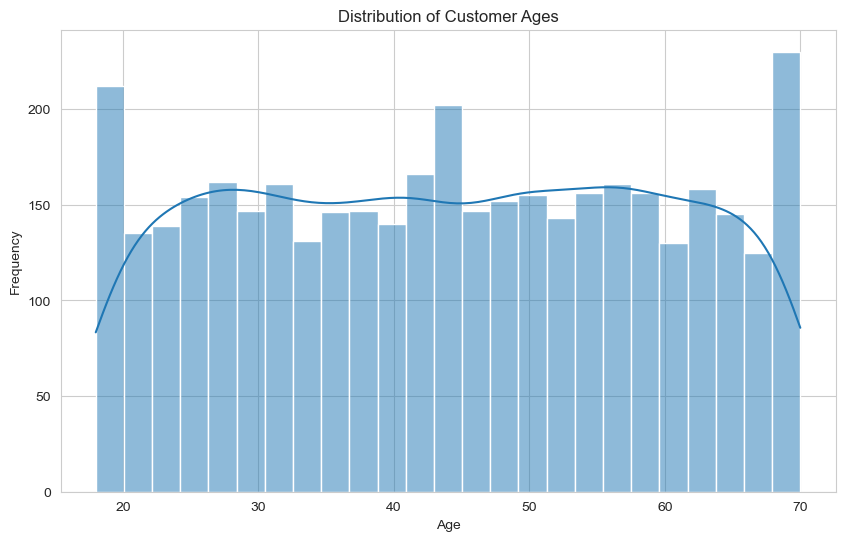

In [21]:
# Explore the distribution of customer ages
sns.histplot(data=df, x='age', bins=25, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Next, let's examine the distribution of purchase amounts. This will show us the typical spending range per transaction and identify if spending is concentrated around certain values.

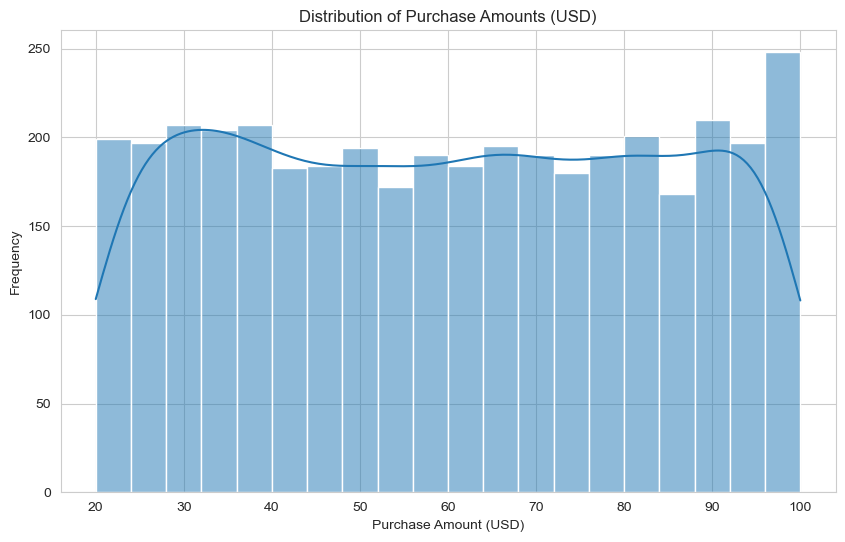

Plot saved to: /home/prof-adept/Shared/Alpha/Programming/Python/Data Science Projects/ecommerce-analysis/figures/purchase_amount_distribution.png


In [24]:
# --- Univariate Analysis: Purchase Amount ---

# Create a histogram for the 'purchase_amount_usd' column
# Using kde=True adds a smooth line estimating the distribution
sns.histplot(data=df, x='purchase_amount_usd', bins=20, kde=True) 
plt.title('Distribution of Purchase Amounts (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')

# Define the save path for this plot
save_path_amount = figures_dir / 'purchase_amount_distribution.png'

# Save the figure before showing it
plt.savefig(save_path_amount, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved to: {save_path_amount}")

Let's analyze the distribution of review ratings. This tells us about overall customer satisfaction. Are ratings typically high, low, or spread out?

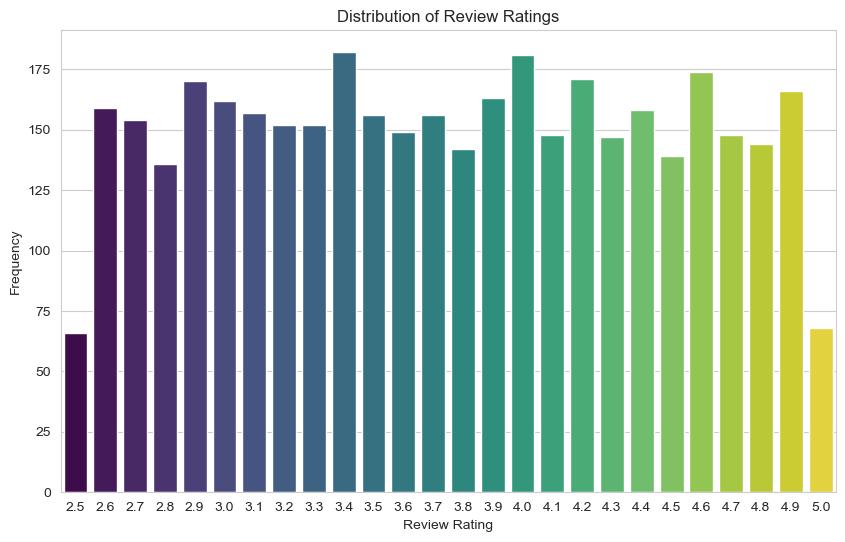

Plot saved to: /home/prof-adept/Shared/Alpha/Programming/Python/Data Science Projects/ecommerce-analysis/figures/review_rating_distribution.png


In [36]:
# --- Univariate Analysis: Review Rating ---

# Create a histogram for the 'review_rating' column
# We can use discrete bins or let histplot choose appropriate ones.
# kde=False might be clearer here as ratings aren't perfectly continuous.
# sns.histplot(data=df, x='review_rating', kde=False, bins=10) # Using fewer bins might group similar ratings


# Alternative: A countplot might be better for discrete-like values
sns.countplot(data=df, x='review_rating', hue='review_rating', palette='viridis', legend=False) 
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')

# Define the save path
save_path_rating = figures_dir / 'review_rating_distribution.png'

# Save the figure
plt.savefig(save_path_rating, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved to: {save_path_rating}")

Finally, let's look at the distribution of `previous_purchases`. This helps us understand customer loyalty or tenure. Do we have mostly new customers, mostly returning customers, or a mix?

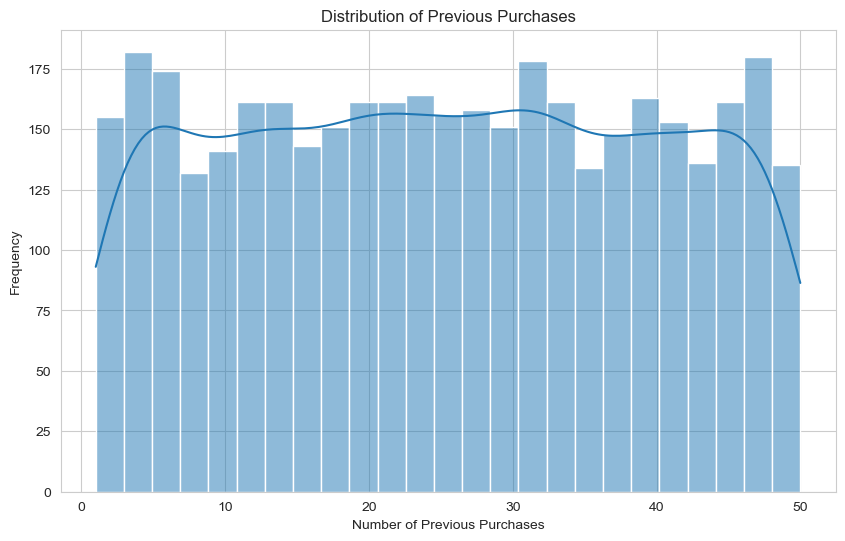

Plot saved to: /home/prof-adept/Shared/Alpha/Programming/Python/Data Science Projects/ecommerce-analysis/figures/previous_purchases_distribution.png


In [28]:
# --- Univariate Analysis: Previous Purchases ---

# Create a histogram for the 'previous_purchases' column
sns.histplot(data=df, x='previous_purchases', bins=25, kde=True) # Using 25 bins for a range of 1-50

plt.title('Distribution of Previous Purchases')
plt.xlabel('Number of Previous Purchases')
plt.ylabel('Frequency')

# Define the save path
save_path_prev_purchases = figures_dir / 'previous_purchases_distribution.png'

# Save the figure
plt.savefig(save_path_prev_purchases, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved to: {save_path_prev_purchases}")

To specifically demonstrate Matplotlib's capabilities, let's create a pie chart showing the proportion of customers based on their `subscription_status`. Pie charts are effective for visualizing parts of a whole for a single categorical variable with few categories.

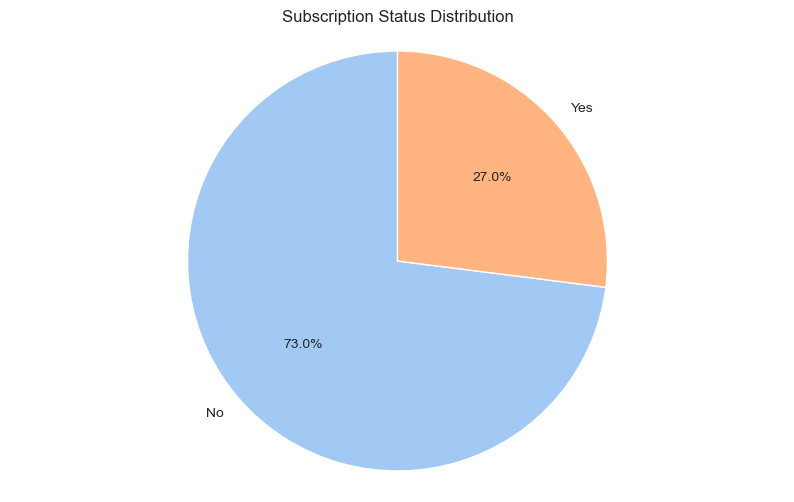

Pie chart saved to: /home/prof-adept/Shared/Alpha/Programming/Python/Data Science Projects/ecommerce-analysis/figures/subscription_status_pie_chart.png

Subscription Counts:
 subscription_status
No     2847
Yes    1053
Name: count, dtype: int64


In [29]:
# --- Univariate Analysis: Subscription Status (using Matplotlib) ---

# 1. Calculate the counts for each subscription status
subscription_counts = df['subscription_status'].value_counts()

# 2. Extract the labels (e.g., 'Yes', 'No') and sizes (the counts)
labels = subscription_counts.index
sizes = subscription_counts.values

# 3. Create the pie chart using Matplotlib directly
fig, ax = plt.subplots() # Create a figure and an axes object

# ax.pie() is the Matplotlib function for pie charts
# - sizes: The data (counts) for each wedge
# - labels: The labels for each wedge
# - autopct='%1.1f%%': Format to display percentage on each wedge (1 decimal place)
# - startangle=90: Rotates the start of the first wedge to the top
# - colors: Optionally specify colors (using Seaborn's palette for nice colors)
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  

plt.title('Subscription Status Distribution')

# Define the save path
save_path_subscription_pie = figures_dir / 'subscription_status_pie_chart.png'

# Save the figure
# We save the 'fig' object directly when using the axes-level interface
fig.savefig(save_path_subscription_pie, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Pie chart saved to: {save_path_subscription_pie}")
print("\nSubscription Counts:\n", subscription_counts) # Also print the raw counts

### 8. Univariate Analysis: Categorical Variables

Now, let's explore the distribution of key categorical features to understand the composition of the customer base and their preferences. We'll start with `gender`.

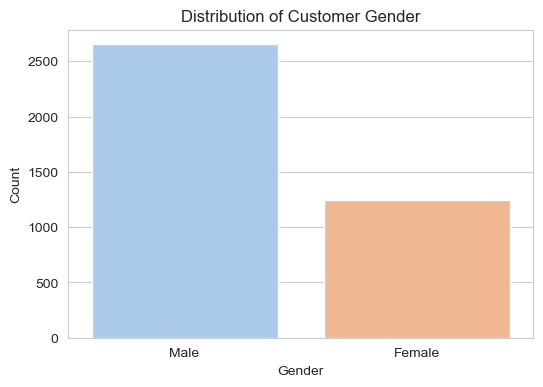


Gender Counts:
 gender
Male      2652
Female    1248
Name: count, dtype: int64


In [31]:
# --- Univariate Analysis: Gender (Updated Code) ---

plt.figure(figsize=(6, 4))
# Assign 'gender' to hue as well, and disable the legend
sns.countplot(
    data=df, 
    x='gender', 
    hue='gender', 
    palette='pastel', 
    order=df['gender'].value_counts().index, 
    legend=False
)
plt.title('Distribution of Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Define save path
save_path_gender = figures_dir / 'gender_distribution.png'
# Save the plot
plt.savefig(save_path_gender, dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

# Optional: Print exact counts
print("\nGender Counts:\n", df['gender'].value_counts())

Next, let's analyze the distribution of product categories. Which categories are the most popular among customers? A count plot is ideal for this. We'll plot it horizontally for better readability of the category names.

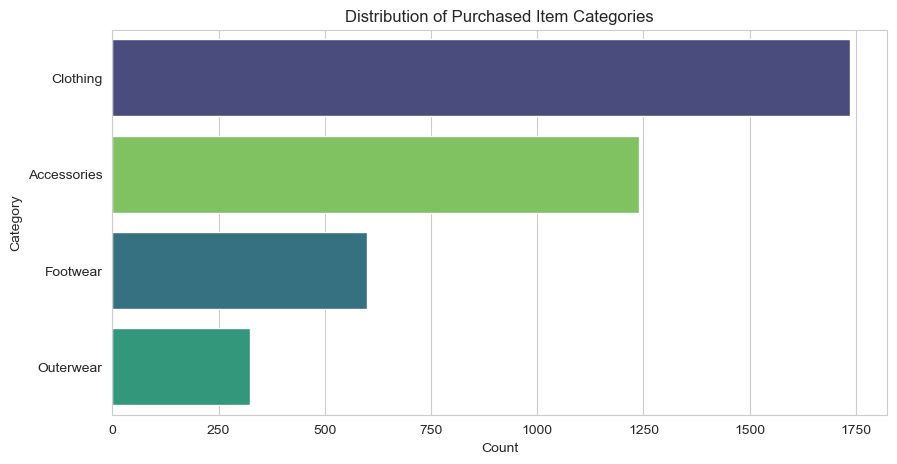


Category Counts:
 category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


In [37]:
# --- Univariate Analysis: Category ---

# Create a figure with potentially slightly larger height for horizontal bars
plt.figure(figsize=(10, 5)) 

# Create the count plot
# Using y='category' makes it a horizontal bar chart
# Using hue='category' and legend=False handles the palette warning
sns.countplot(
    data=df, 
    y='category', 
    hue='category', # Assign category to hue as well
    order=df['category'].value_counts().index, # Order bars by frequency
    palette='viridis', # Use a different color palette
    legend=False # Hide the redundant legend
)
plt.title('Distribution of Purchased Item Categories')
plt.xlabel('Count') # X-axis is now Count
plt.ylabel('Category') # Y-axis is now Category

# Define save path
save_path_category = figures_dir / 'category_distribution.png'
# Save the plot
plt.savefig(save_path_category, dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

# Optional: Print exact counts
print("\nCategory Counts:\n", df['category'].value_counts())

The dataset contains customers from 50 different locations. To make the visualization manageable and focus on the most common areas, we'll plot the distribution for only the **Top 10** locations by customer count.

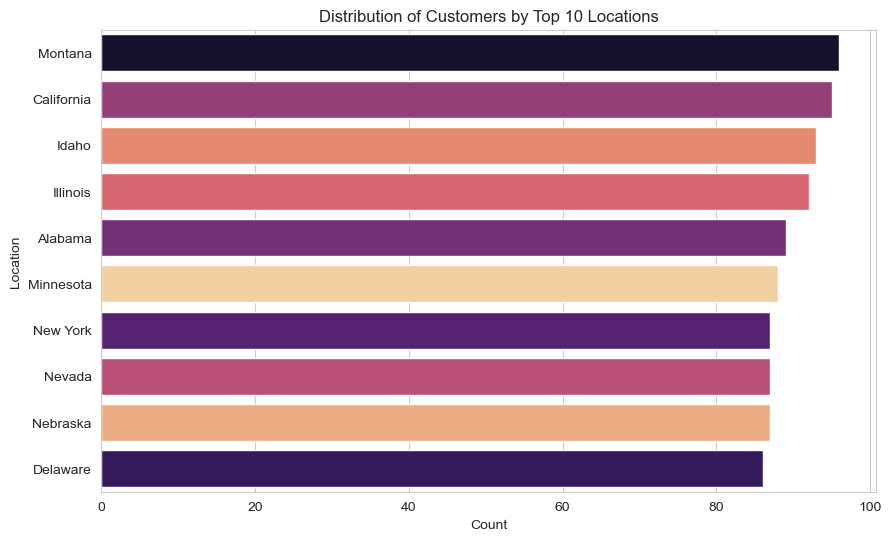


Top 10 Location Counts:
 location
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Minnesota     88
New York      87
Nevada        87
Nebraska      87
Delaware      86
Name: count, dtype: int64


In [38]:
# --- Univariate Analysis: Top 10 Locations ---

# Define how many top locations to show
top_n = 10

# Get the value counts for 'location' and select the top N
top_locations = df['location'].value_counts().nlargest(top_n)

# Create a figure
plt.figure(figsize=(10, 6)) # Adjust size if needed

# Create the count plot ONLY for the top N locations
# We use the 'order' parameter to specify exactly which categories (locations) to plot
sns.countplot(
    data=df[df['location'].isin(top_locations.index)], # Filter df to include only top N
    y='location', 
    hue='location', # Assign hue for palette handling
    order=top_locations.index, # Ensure order is from most to least frequent
    palette='magma', # Another color palette option
    legend=False # Hide legend
)
plt.title(f'Distribution of Customers by Top {top_n} Locations')
plt.xlabel('Count')
plt.ylabel('Location')

# Define save path
save_path_location = figures_dir / f'top_{top_n}_locations_distribution.png'
# Save the plot
plt.savefig(save_path_location, dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

# Optional: Print exact counts for top N
print(f"\nTop {top_n} Location Counts:\n", top_locations)

Now, let's examine the `season` column to see how purchase frequency varies throughout the year. Are certain seasons significantly more popular for shopping?

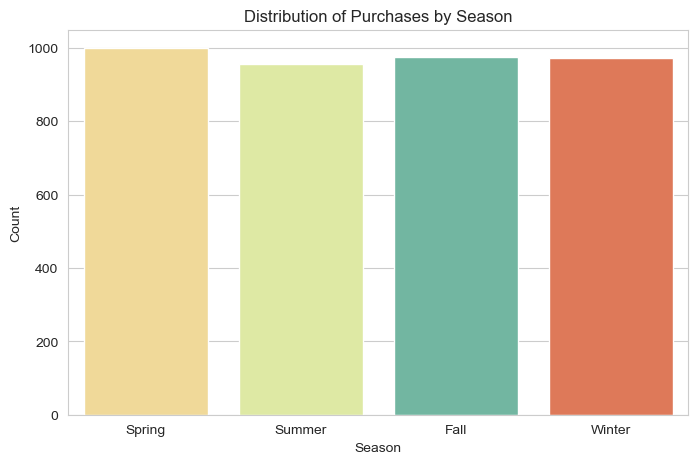


Season Counts:
 season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64


In [39]:
# --- Univariate Analysis: Season ---

# Create a figure
plt.figure(figsize=(8, 5)) # Adjust size if needed

# Create the count plot for 'season'
# Explicitly define a sensible order if desired (e.g., chronological)
season_order = ['Spring', 'Summer', 'Fall', 'Winter'] 
# Check if all expected seasons are actually in the data before ordering
available_seasons = df['season'].unique()
if set(season_order).issubset(set(available_seasons)):
    order_to_use = season_order
else:
    # Fallback to frequency order if predefined order doesn't match data
    order_to_use = df['season'].value_counts().index 
    print("Note: Using frequency order for seasons as predefined order doesn't fully match data.")

sns.countplot(
    data=df, 
    x='season', 
    hue='season',      # Handle palette warning
    order=order_to_use, # Use the determined order
    palette='Spectral', # Another palette option
    legend=False       # Hide legend
)
plt.title('Distribution of Purchases by Season')
plt.xlabel('Season')
plt.ylabel('Count')

# Define save path
save_path_season = figures_dir / 'season_distribution.png'
# Save the plot
plt.savefig(save_path_season, dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

# Optional: Print exact counts
print("\nSeason Counts:\n", df['season'].value_counts())

Understanding payment preferences is also useful. Let's visualize the distribution of `payment_method` used by customers.

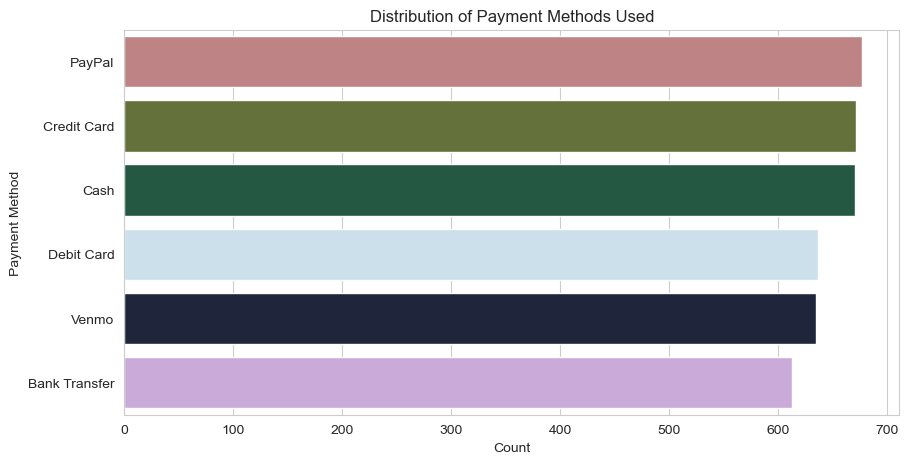


Payment Method Counts:
 payment_method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64


In [40]:
# --- Univariate Analysis: Payment Method ---

plt.figure(figsize=(10, 5)) # Adjust size for potentially longer labels

sns.countplot(
    data=df,
    y='payment_method',
    hue='payment_method',
    order=df['payment_method'].value_counts().index,
    palette='cubehelix',
    legend=False
)
plt.title('Distribution of Payment Methods Used')
plt.xlabel('Count')
plt.ylabel('Payment Method')

save_path_payment = figures_dir / 'payment_method_distribution.png'
plt.savefig(save_path_payment, dpi=300, bbox_inches='tight')
plt.show()

print("\nPayment Method Counts:\n", df['payment_method'].value_counts())

### 9. Bivariate Analysis: Exploring Relationships

Now that we understand the distributions of individual variables, let's explore relationships *between pairs* of variables. This can reveal deeper insights into customer behavior. We'll start by examining how key features relate to the `purchase_amount_usd`.

First, let's investigate if there's a relationship between a customer's `age` and their `purchase_amount_usd`. A scatter plot is suitable for visualizing the relationship between two numerical variables.

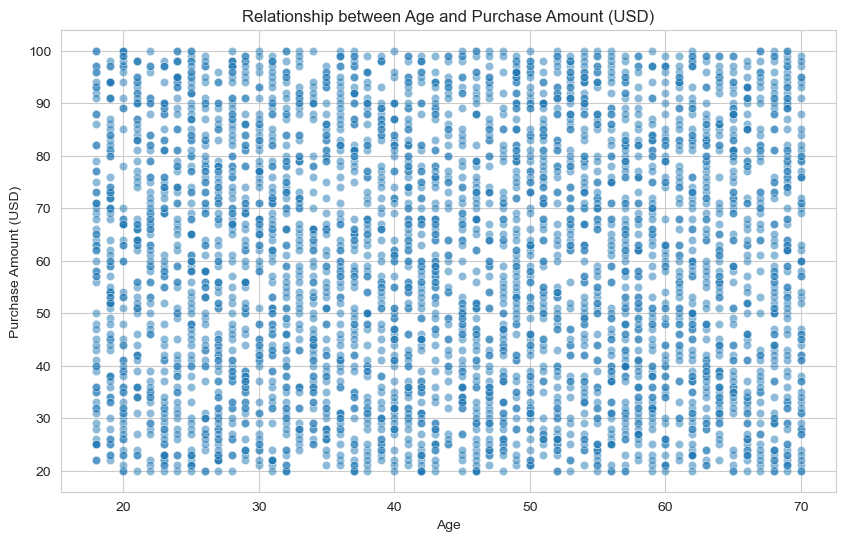


Correlation between Age and Purchase Amount: -0.01


In [43]:
# --- Bivariate Analysis: Age vs. Purchase Amount ---

plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(data=df, x='age', y='purchase_amount_usd', alpha=0.5) # alpha adds transparency

plt.title('Relationship between Age and Purchase Amount (USD)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')

save_path_age_purchase = figures_dir / 'age_vs_purchase_scatter.png'
plt.savefig(save_path_age_purchase, dpi=300, bbox_inches='tight')
plt.show()

# Optional: Calculate Correlation
correlation_age_purchase = df['age'].corr(df['purchase_amount_usd'])
print(f"\nCorrelation between Age and Purchase Amount: {correlation_age_purchase:.2f}")

Next, let's see how the purchase amount varies across different product categories. Does spending significantly differ based on the type of item purchased? A box plot effectively visualizes the distribution (median, quartiles, range, and potential outliers) of `purchase_amount_usd` for each `category`.

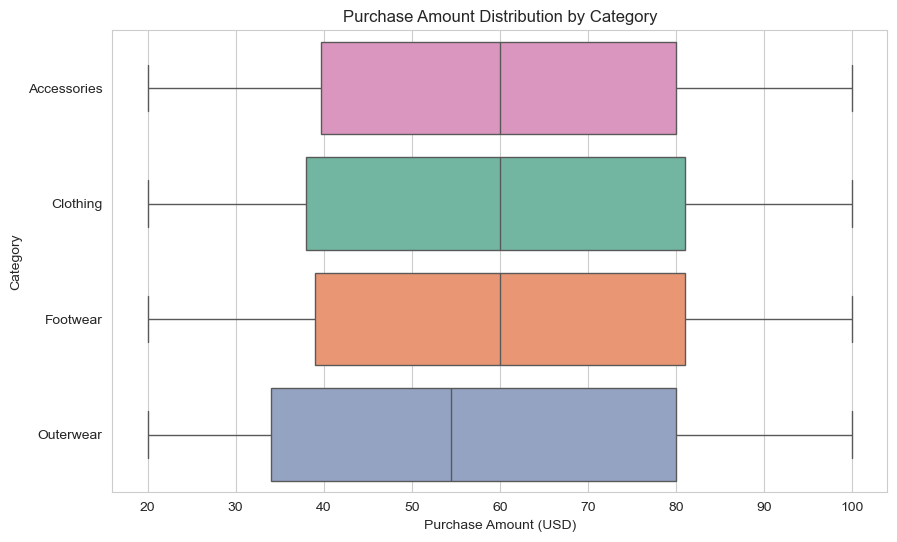

In [46]:
# --- Bivariate Analysis: Category vs. Purchase Amount ---

plt.figure(figsize=(10, 6)) # Adjust size if needed

# Create the box plot
# Order categories by median purchase amount for better comparison
median_order = df.groupby('category')['purchase_amount_usd'].median().sort_values(ascending=False).index

sns.boxplot(
    data=df, 
    x='purchase_amount_usd', 
    y='category', 
    hue='category',
    order=median_order, # Order the categories on the y-axis
    palette='Set2'      # Use a different color palette
)

plt.title('Purchase Amount Distribution by Category')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Category')

# Define save path
save_path_cat_purchase = figures_dir / 'category_vs_purchase_boxplot.png'
# Save the plot
plt.savefig(save_path_cat_purchase, dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

Let's examine if `gender` influences `purchase_amount_usd`. A violin plot is useful here as it combines a box plot (showing median, quartiles) with a kernel density estimate (showing the distribution shape) for each category.

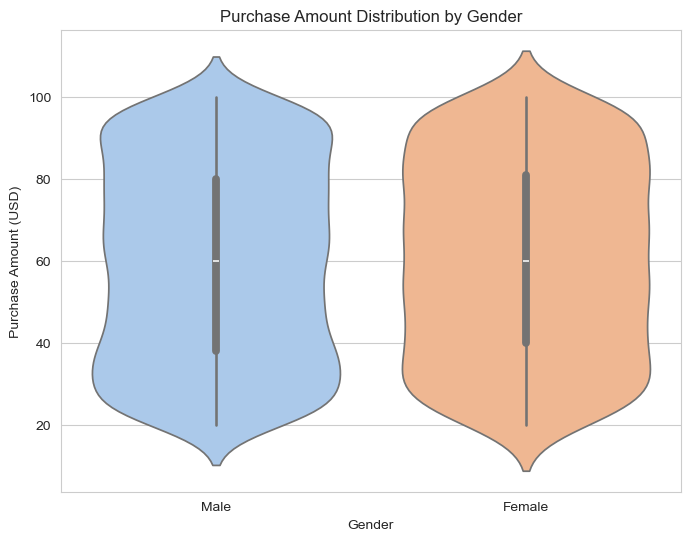


Purchase Amount Stats by Gender:
          count       mean        std   min   25%   50%   75%    max
gender                                                             
Female  1248.0  60.249199  23.420556  20.0  40.0  60.0  81.0  100.0
Male    2652.0  59.536199  23.809976  20.0  38.0  60.0  80.0  100.0


In [47]:
# --- Bivariate Analysis: Gender vs. Purchase Amount ---

plt.figure(figsize=(8, 6)) # Adjust size if needed

# Create the violin plot
sns.violinplot(
    data=df, 
    x='gender',        # Categorical variable on x-axis
    y='purchase_amount_usd', # Numerical variable on y-axis
    palette='pastel',  # Use the same palette as the gender countplot
    hue='gender',      # Assign hue for palette handling & consistency
    legend=False       # Hide legend
)

plt.title('Purchase Amount Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')

# Define save path
save_path_gender_purchase = figures_dir / 'gender_vs_purchase_violinplot.png'
# Save the plot
plt.savefig(save_path_gender_purchase, dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

# Optional: Print descriptive statistics grouped by gender
print("\nPurchase Amount Stats by Gender:\n", df.groupby('gender')['purchase_amount_usd'].describe())

We observed earlier that 'Spring' had the highest count of purchases. Now let's see if the *amount* spent per purchase varies significantly by `season`. A box plot comparing `purchase_amount_usd` across the seasons will clarify this. We'll order the seasons chronologically.

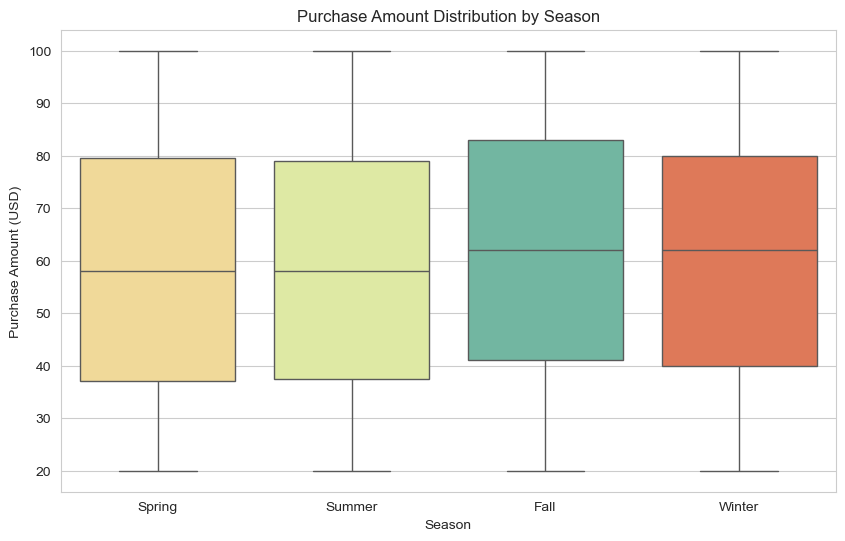


Purchase Amount Stats by Season:
         count       mean        std   min   25%   50%   75%    max
season                                                            
Fall    975.0  61.556923  23.745022  20.0  41.0  62.0  83.0  100.0
Spring  999.0  58.737738  23.935855  20.0  37.0  58.0  79.5  100.0
Summer  955.0  58.405236  23.470580  20.0  37.5  58.0  79.0  100.0
Winter  971.0  60.357364  23.475475  20.0  40.0  62.0  80.0  100.0


In [49]:
# --- Bivariate Analysis: Season vs. Purchase Amount (Corrected Code) ---

plt.figure(figsize=(10, 6))

# Define the chronological order for seasons
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# Create the box plot
sns.boxplot(
    data=df,
    x='season',                # Categorical variable on x-axis
    y='purchase_amount_usd', # Numerical variable on y-axis
    hue='season',              # ADDED: Assign hue for palette handling
    order=season_order,        # Apply the defined order
    palette='Spectral',        # Use the same palette as the season countplot
    legend=False               # ADDED: Hide redundant legend
)

plt.title('Purchase Amount Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')

# Define save path
save_path_season_purchase = figures_dir / 'season_vs_purchase_boxplot.png'
# Save the plot
plt.savefig(save_path_season_purchase, dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

# Optional: Print descriptive statistics grouped by season
print("\nPurchase Amount Stats by Season:\n", df.groupby('season')['purchase_amount_usd'].describe())

Does having a subscription influence how much a customer spends per purchase? Let's compare the `purchase_amount_usd` distribution for customers with (`Yes`) and without (`No`) a subscription using a box plot.

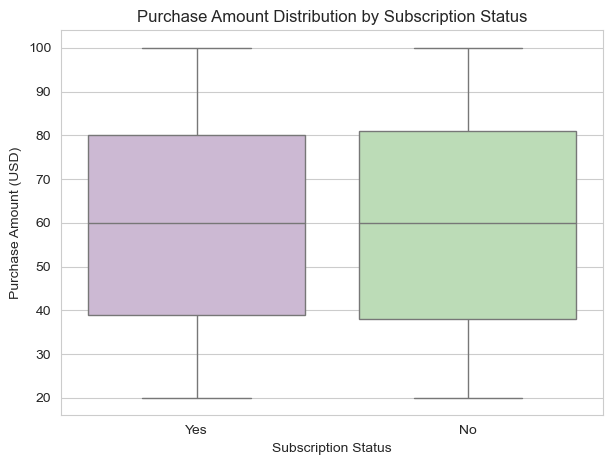


Purchase Amount Stats by Subscription Status:
                       count       mean        std   min   25%   50%   75%  \
subscription_status                                                         
No                   2847.0  59.865121  23.775199  20.0  38.0  60.0  81.0   
Yes                  1053.0  59.491928  23.449914  20.0  39.0  60.0  80.0   

                       max  
subscription_status         
No                   100.0  
Yes                  100.0  


In [50]:
# --- Bivariate Analysis: Subscription Status vs. Purchase Amount ---

plt.figure(figsize=(7, 5)) # Smaller figure for two categories

# Create the box plot
sns.boxplot(
    data=df,
    x='subscription_status',   # Categorical on x-axis ('Yes', 'No')
    y='purchase_amount_usd', # Numerical on y-axis
    hue='subscription_status', # Handle palette warning
    palette='PRGn',            # A different palette (Purple-Green)
    legend=False               # Hide legend
)

plt.title('Purchase Amount Distribution by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Purchase Amount (USD)')

# Define save path
save_path_sub_purchase = figures_dir / 'subscription_vs_purchase_boxplot.png'
# Save the plot
plt.savefig(save_path_sub_purchase, dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

# Optional: Print descriptive statistics grouped by subscription status
print("\nPurchase Amount Stats by Subscription Status:\n", df.groupby('subscription_status')['purchase_amount_usd'].describe())

We've seen the overall popularity of categories and the overall gender distribution. Now let's combine them: do male and female customers prefer different product categories? We can visualize this using a count plot grouped by gender.

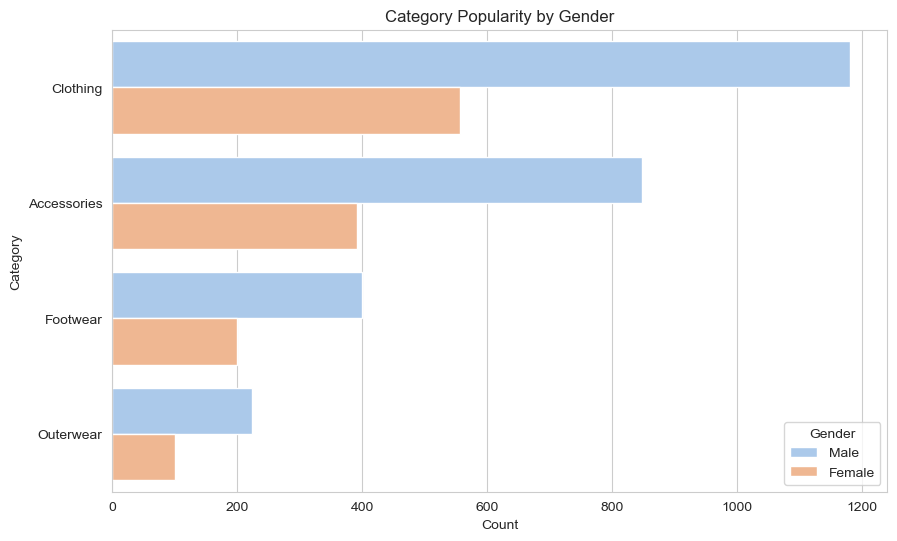


Cross-tabulation of Category vs Gender:

gender       Female  Male
category                 
Accessories     392   848
Clothing        556  1181
Footwear        199   400
Outerwear       101   223


In [52]:
# --- Bivariate Analysis: Category vs. Gender (Corrected Code) ---

plt.figure(figsize=(10, 6))

# Create the grouped count plot
# ADD legend=True if you WANT the legend, False if using hue just for palette
ax = sns.countplot(
    data=df,
    y='category',    # Categories on the y-axis
    hue='gender',      # Split bars based on gender
    order=df['category'].value_counts().index, # Order categories overall
    palette='pastel' # Use the same palette as the gender plot
    # REMOVED the redundant plt.legend() call below
)

# Set title and labels directly on the axes object returned by countplot
ax.set_title('Category Popularity by Gender')
ax.set_xlabel('Count')
ax.set_ylabel('Category')

# Improve legend appearance (optional, but good practice)
ax.legend(title='Gender') # You can set the title here on the axes legend

# Define save path
save_path_cat_gender = figures_dir / 'category_vs_gender_countplot.png'
# Save the plot (using fig obtained from ax)
plt.gcf().savefig(save_path_cat_gender, dpi=300, bbox_inches='tight') # gcf() gets current figure
# Show the plot
plt.show()

# Optional: Print cross-tabulation for exact numbers
print("\nCross-tabulation of Category vs Gender:\n")
print(pd.crosstab(df['category'], df['gender']))

To complete our bivariate analysis, let's investigate if there's an interaction between `season` and product `category`. Are certain categories purchased more frequently during specific seasons? A heatmap visualizing a cross-tabulation of counts is an effective way to see these patterns.

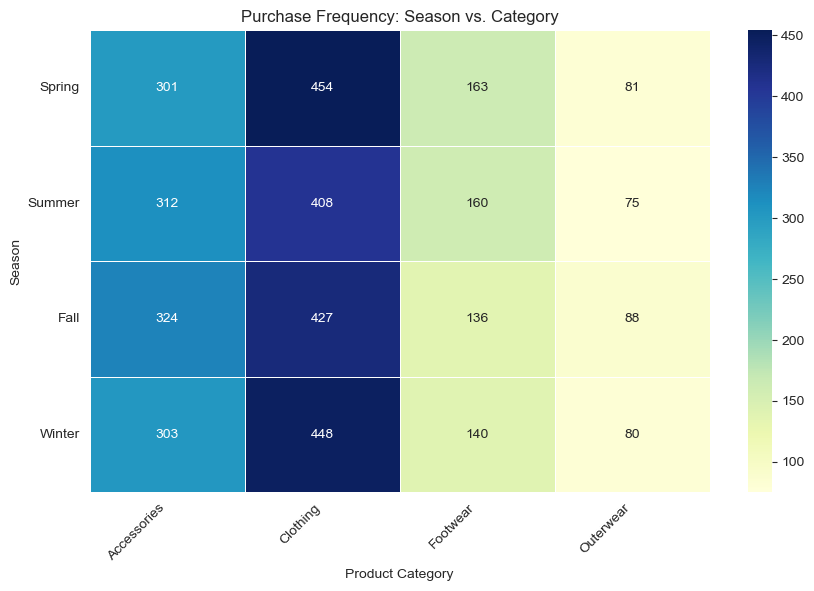


Cross-tabulation of Season vs Category:

category  Accessories  Clothing  Footwear  Outerwear
season                                              
Spring            301       454       163         81
Summer            312       408       160         75
Fall              324       427       136         88
Winter            303       448       140         80


In [53]:
# --- Bivariate Analysis: Season vs. Category Heatmap ---

# 1. Create a cross-tabulation (frequency table)
season_category_counts = pd.crosstab(df['season'], df['category'])

# Reindex rows to ensure chronological season order if desired
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
# Ensure all seasons in order are present in the crosstab index before reindexing
available_seasons_idx = season_category_counts.index
if set(season_order).issubset(set(available_seasons_idx)):
    season_category_counts = season_category_counts.reindex(season_order)

# 2. Create the heatmap
plt.figure(figsize=(10, 6)) # Adjust size if needed
sns.heatmap(
    season_category_counts, 
    annot=True,    # Display the counts on the cells
    fmt='d',       # Format annotations as integers
    cmap='YlGnBu', # Choose a color map (e.g., Yellow-Green-Blue)
    linewidths=.5  # Add lines between cells
)

plt.title('Purchase Frequency: Season vs. Category')
plt.xlabel('Product Category')
plt.ylabel('Season')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better fit
plt.yticks(rotation=0) # Ensure y-axis labels are horizontal

# Define save path
save_path_season_cat_heatmap = figures_dir / 'season_vs_category_heatmap.png'
# Save the plot
plt.savefig(save_path_season_cat_heatmap, dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

# Optional: Display the crosstab table itself
print("\nCross-tabulation of Season vs Category:\n")
print(season_category_counts)